# Задание на работу

Справочный материал:

ML_5_1_scikit-learn_персептрон.pdf

ML_5_2_scikit-learn_логист_регрессия.pdf

ML_5_3_scikit-learn_регуляризация

ML_5_4_scikit-learn_мет_опорн_вект.pdf

Задания.
1. При помощи функции make_blobs() из модуля sklearn.datasets (см.пример ниже) сгенерировать
исходные данные для задачи классификации:

– матрицу признаков, содержащую по три признака для 500 примеров;

– массив целевых меток, представляющий четыре класса.

Значения аргументов random_state и cluster_std функции make_blobs() необходимо взять из табл.1.
2. Выполнить разделение набора данных на тренировочный и тестовый наборы. Вывести на печать размерности
полученных массивов. Вывести на печать уникальные метки классов в наборе данных.
3. Выполнить масштабирование признаков.
4. Решить задачу классификации с использованием метода, указанного в табл.1.
5. Проверить работу классификатора на тестовых данных. Определить и вывести на печать:
– число неверно классифицированных образов;
– "верность" классификации (в комментариях пояснить, что обозначает полученное значение "Верности");
– вероятности принадлежности образцов с номерами 10, 20 и 100 различным классам
(только для модели логистической регрессии).
6. Для трёх проекций пространства признаков построить графики, иллюстрирующие расположение объектов
различных классов. Классы на графиках обозначать различными цветами и маркерами.
Обвести на графиках окружностями те объекты, которые были неверно классифицированы.
7. Сделать выводы по проделанной работе.



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Задание 1
При помощи функции make_blobs() из модуля sklearn.datasets (см.пример ниже) сгенерировать исходные данные для задачи классификации:

– матрицу признаков, содержащую по три признака для 500 примеров;

– массив целевых меток, представляющий четыре класса.

Значения аргументов random_state и cluster_std функции make_blobs() необходимо взять из табл.1.

In [2]:
x, y = make_blobs(500, 3, centers=4, random_state=2, cluster_std=1.0)

# Задание 2
Выполнить разделение набора данных на тренировочный и тестовый наборы. Вывести на печать размерности полученных массивов. Вывести на печать уникальные метки классов в наборе данных.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)

In [6]:
print(f'''Обучающий набор:
Размерность массива признаков: {x_train.shape}
Размерность целевых признаков: {y_train.shape}
Уникальные метки классов: {np.unique(y_train)}

Тестовый набор:
Размерность массива признаков: {x_test.shape}
Размерность целевых признаков: {y_test.shape}
Уникальные метки классов: {np.unique(y_test)}''')

Обучающий набор:
Размерность массива признаков: (400, 3)
Размерность целевых признаков: (400,)
Уникальные метки классов: [0 1 2 3]

Тестовый набор:
Размерность массива признаков: (100, 3)
Размерность целевых признаков: (100,)
Уникальные метки классов: [0 1 2 3]


# Задание 3
Выполнить масштабирование признаков

In [8]:
standard_scaler = StandardScaler()

standard_scaler.fit(x_train)

x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

# Задание 4
Решить задачу классификации с использованием метода, указанного в табл.1

In [10]:
logistic_regression = LogisticRegression(C=1000.0, random_state=2)
logistic_regression.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000.0, random_state=2)

# Задание 5
Проверить работу классификатора на тестовых данных. Определить и вывести на печать:

– число неверно классифицированных образов;

– "верность" классификации (в комментариях пояснить, что обозначает полученное значение "Верности");

– вероятности принадлежности образцов с номерами 10, 20 и 100 различным классам
(только для модели логистической регрессии).

In [12]:
y_pred_log_reg = logistic_regression.predict(x_test_scaled)
y_pred_train_log_reg = logistic_regression.predict(x_train_scaled)
mean_mistakes_log_reg = ((y_test!=y_pred_log_reg).sum() + (y_train!=y_pred_train_log_reg).sum())/2

# Принадлежности к различным классам образцов 10, 20, 100:
# Так как нумерация начинается с 0, то 10-ый образец - это 9 по индексы,
# 20 - 19 по индексу и 100 - 99 по индексу
proba_10 = logistic_regression.predict_proba(x_test_scaled[9, :].reshape(1, -1))
proba_20 = logistic_regression.predict_proba(x_test_scaled[19, :].reshape(1, -1))
proba_100 = logistic_regression.predict_proba(x_test_scaled[99, :].reshape(1, -1))

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_log_reg).sum()}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_log_reg)}''')
print(f'''Вероятность принадлежности к различным классам образца 10 тестовой выборки: {proba_10}''')
print(f'''Вероятность принадлежности к различным классам образца 20 тестовой выборки: {proba_20}''')
print(f'''Вероятность принадлежности к различным классам образца 100 тестовой выборки: {proba_100}''')

Число неверно классифицированных образов: 2
Верность классификации: 0.98
Вероятность принадлежности к различным классам образца 10 тестовой выборки: [[7.91986528e-04 9.99201056e-01 1.75047857e-08 6.94026907e-06]]
Вероятность принадлежности к различным классам образца 20 тестовой выборки: [[2.88378977e-15 2.34101879e-12 8.73677227e-04 9.99126323e-01]]
Вероятность принадлежности к различным классам образца 100 тестовой выборки: [[4.30907397e-15 2.40616515e-11 4.20767399e-03 9.95792326e-01]]


# Задание 6
Для трёх проекций пространства признаков построить графики, иллюстрирующие расположение объектов
различных классов. Классы на графиках обозначать различными цветами и маркерами.
Обвести на графиках окружностями те объекты, которые были неверно классифицированы.

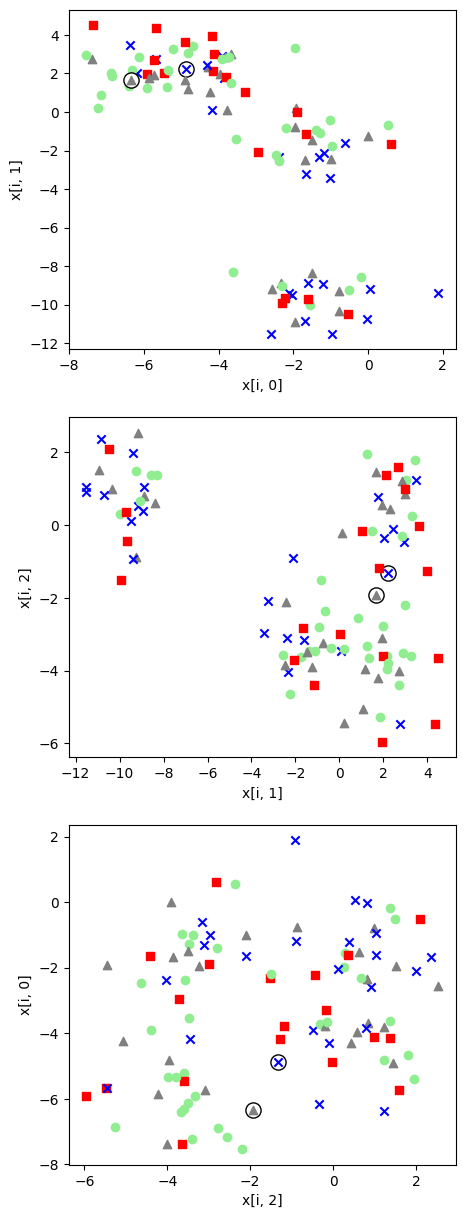

In [22]:
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
markers = ('s', 'x', 'o', '^', 'v')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

for i in range(y_test.shape[0]):
    if y_test[i] != y_pred_log_reg[i]:
        ax[0].scatter(x_test[i,0], x_test[i,1], c='white', alpha=1.0, edgecolor='black', linewidth=1, marker='o', s=120)
        ax[1].scatter(x_test[i,1], x_test[i,2], c='white', alpha=1.0, edgecolor='black', linewidth=1, marker='o', s=120)
        ax[2].scatter(x_test[i,2], x_test[i,0], c='white', alpha=1.0, edgecolor='black', linewidth=1, marker='o', s=120)

    ax[0].scatter(x_test[i,0], x_test[i,1], color = colors[y[i]], marker=markers[y[i]])
    ax[1].scatter(x_test[i,1], x_test[i,2], color = colors[y[i]], marker=markers[y[i]])
    ax[2].scatter(x_test[i,2], x_test[i,0], color = colors[y[i]], marker=markers[y[i]])

ax[0].set_xlabel('x[i, 0]')
ax[1].set_xlabel('x[i, 1]')
ax[2].set_xlabel('x[i, 2]')

ax[0].set_ylabel('x[i, 1]')
ax[1].set_ylabel('x[i, 2]')
ax[2].set_ylabel('x[i, 0]')
plt.show()

# Задание 7
Сделать выводы по проделанной работе.

В ходе лабораторной работы для линейно ращделимых объектов, состоящих из 3 признаков и разделенных на 4 класса была применена задача классификации.

Данные были разделены на обучающую и тестовую выборку, а также приведены к виду нормального распределения при помощи функции StandardScaler.

Для решения задачи использовалась модель логистической регрессии, которая по итогам обучения показала отличные результаты: на тестовом наборе данных неверно были распознаны только 2 объекта. Таким образом, точность на тестовой выборке составила 98%.

Далее, итог классификации был выведен в качестве проекции пространства. На графиках гругами были отмечены неверно распознанные объекты. Так как неверно было выделено только 2 объекта, они и видны на графиках.